In [127]:
import tensorflow as tf
import os
import random
import numpy as np

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [128]:
import os
import cv2
import numpy as np

# Define the directories containing train and mask images
train_dir_angular = r'C:/Users/Admin/Documents/124156079/sankarnarayan/sankarnarayan/MYNEWTRAIN/angular'
train_dir_rust = r'C:/Users/Admin/Documents/124156079/sankarnarayan/sankarnarayan/MYNEWTRAIN/rust'
mask_dir_angular = r'C:/Users/Admin/Documents/124156079/sankarnarayan/sankarnarayan/MYNEWTRAINMASK/angular'
mask_dir_rust = r'C:/Users/Admin/Documents/124156079/sankarnarayan/sankarnarayan/MYNEWTRAINMASK/rust'

# Define the target size for resizing
target_size = (256, 256)  # Adjust to your desired size

# Initialize lists to store resized images and masks
train_images = []
mask_images = []

# Function to load and resize images
def load_and_resize_images(image_dir):
    images = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                images.append(image)
    return images

# Load and resize train images
train_images_angular = load_and_resize_images(train_dir_angular)
train_images_rust = load_and_resize_images(train_dir_rust)

# Load and resize mask images
mask_images_angular = load_and_resize_images(mask_dir_angular)
mask_images_rust = load_and_resize_images(mask_dir_rust)

# Combine train and mask images into numpy arrays
train_images = np.concatenate([train_images_angular, train_images_rust], axis=0)
mask_images = np.concatenate([mask_images_angular, mask_images_rust], axis=0)

# Check the shape of the resulting arrays
print("Train Images Shape:", train_images.shape)
print("Mask Images Shape:", mask_images.shape)


Train Images Shape: (598, 256, 256, 3)
Mask Images Shape: (598, 256, 256, 3)


In [129]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, mask_images, test_size=0.2, random_state=42)

# X_train: Training images
# y_train: Corresponding masks for training images
# X_test: Testing images
# y_test: Corresponding masks for testing images
# test_size: The fraction of data to allocate for testing (here, 20%)
# random_state: Seed for random number generation (for reproducibility)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (478, 256, 256, 3)
y_train shape: (478, 256, 256, 3)
X_test shape: (120, 256, 256, 3)
y_test shape: (120, 256, 256, 3)


In [130]:
len(X_test)

120

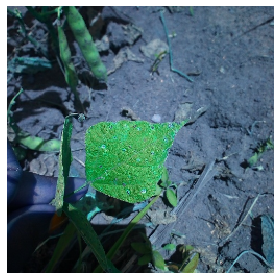

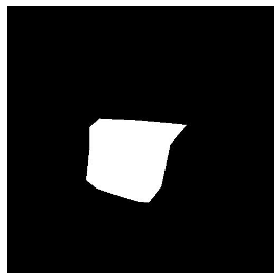

In [131]:
image_x = random.randint(0, len(X_train))
plt.axis("off")
imshow(X_train[image_x])
plt.show()
plt.axis("off")
imshow(np.squeeze(y_train[image_x]))
plt.show()

In [132]:
num_classes = 1

In [133]:
inputs = tf.keras.layers.Input(shape=(None, None, 3))

In [136]:
def encoder(inputs):
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.2)(c5)
    c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    p5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)

    c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
    c6 = tf.keras.layers.Dropout(0.3)(c6)
    c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    return c6

In [137]:
def decoder(c6):
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Add()([u7, c7])

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Add()([u8, c8])

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Add()([u9, c9])

    u10 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c9)
    c10 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
    c10 = tf.keras.layers.Add()([u10, c10])

    outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c10)
    return outputs


In [138]:
encoder = encoder(inputs)
outputs = decoder(encoder)

In [139]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [140]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_278 (Conv2D)            (None, None, None,   448         ['input_9[0][0]']                
                                16)                                                               
                                                                                                  
 dropout_26 (Dropout)           (None, None, None,   0           ['conv2d_278[0][0]']             
                                16)                                                         

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=16, epochs=50, callbacks=callbacks)

Epoch 1/50


ValueError: in user code:

    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1930, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5283, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 256, 256, 1) vs (None, 256, 256, 3)).


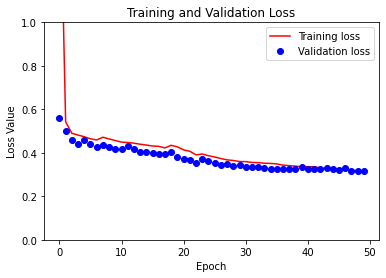

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure()
plt.plot( loss, 'r', label='Training loss')
plt.plot( val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

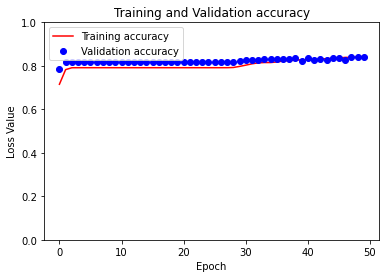

In [ ]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

plt.figure()
plt.plot( accuracy, 'r', label='Training accuracy')
plt.plot( val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input image', 'True mask', 'Predicted mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
i = random.randint(0, len(X_test))
sample_image = X_test[i]
sample_mask = y_test[i]

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 2s 208ms/step


In [ ]:
len(predictions[0])

128

In [ ]:
len(predictions)

222

In [ ]:
prediction = model.predict(sample_image[tf.newaxis, ...])[0]

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 31ms/step


In [ ]:
predicted_mask = (prediction > 0.5).astype(np.uint8)

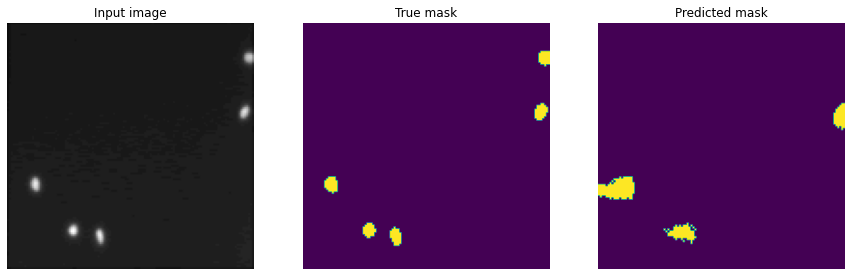

In [ ]:
display([sample_image, sample_mask,predicted_mask])

In [ ]:
 # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
image = load_img("C:/Users/Admin/Documents/124156079/BOWL/BOWL/stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e//images//00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

1/1 [==============================] - 0s 216ms/step


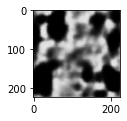

In [ ]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()